# Hacktiv8  Introduction to Data Science Assigment 3


Nama    : Desi Suci Nopianti
program : Python for Data Science

## Introduction

<h3 id="project-overview">Project Overview</h3>
<p>The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.</p>
<p>There are four datasets:</p>
<ol>
    <li><strong>bank-additional-full.csv</strong> with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]</li>
    <li><strong>bank-additional.csv</strong> with 10% of the examples (4119), randomly selected from 1), and 20 inputs.</li>
    <li><strong>bank-full.csv</strong> with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).</li>
    <li><strong>bank.csv</strong> with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).</li>
</ol>
<p>The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).<br><br>The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).</p>
<p>This dataset contains:</p>
<p>Input variables:</p>
<p><strong> Bank Client data:</strong>
    <br>1 - age (numeric)
    <br>2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    <br>3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    <br>4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    <br>5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
    <br>6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
    <br>7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
    <br># related with the last contact of the current campaign:
    <br>8 - contact: contact communication type (categorical: 'cellular', 'telephone')
    <br>9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    <br>10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
    <br>11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</p>
<p><strong># other attributes:</strong>
    <br>12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    <br>13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    <br>14 - previous: number of contacts performed before this campaign and for this client (numeric)
    <br>15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')<br># social and economic context attributes
    <br>16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    <br>17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    <br>18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    <br>19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    <br>20 - nr.employed: number of employees - quarterly indicator (numeric)
    <br><br>
    <strong>Output variable (desired target):</strong>
    <br>21 - y - has the client subscribed a term deposit? (binary: '<strong>yes</strong>', '<strong>no</strong>')</p>

 # Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import seaborn as sns

from sklearn import tree
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


## Read Dataset

In [3]:
# Mengantisipasi untuk unstandard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN', ' ', ' - ']

#membaca data set
df = pd.read_csv('Dataset/bank-additional-full.csv', delimiter=";")

# menampilkan tampilan kolom full
pd.set_option('display.max_columns', 500)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Menghitung jumlah baris dan kolom
rows, columns = df.shape
print('Dataset ini terdapat: ')
# Menampilkan jumlah baris
print(rows, "Rows")
# Menampilkan jumlah kolom
print(columns, "Columns")

Dataset ini terdapat: 
41188 Rows
21 Columns


In [5]:
# Melihat statistik deskriptif dari data
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Melihat informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# menampilkan jumlah missing value pada dataset
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# cek data categorical
categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()
print("Jumlah fitur categorical : {}".format(len(categorical_features)))
print("Fitur categorical :", categorical_features)

Jumlah fitur categorical : 11
Fitur categorical : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [10]:
# cek data numerical
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
print("Jumlah fitur numerical: {}".format(len(numerical_features)))
print("Fitur numerical :", numerical_features)


Jumlah fitur numerical: 10
Fitur numerical : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [11]:
# cek persentase missing value
data_types = pd.DataFrame(df.dtypes, columns=['Data types'])
Null_count = pd.DataFrame(df.isnull().sum(), columns=['Null count'])
Null_Percentage = pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns=['Null Percentage'])

view_null = pd.concat([data_types, Null_count, Null_Percentage], axis='columns')
view_null

,Data types,Null count,Null Percentage
age,int64,0,0.0
job,object,0,0.0
marital,object,0,0.0
education,object,0,0.0
default,object,0,0.0
housing,object,0,0.0
loan,object,0,0.0
contact,object,0,0.0
month,object,0,0.0
day_of_week,object,0,0.0


In [12]:
# melihat apakah terdapat duplikat pada dataset
df.duplicated().sum()

12

In [13]:
#mendrop data duplikat
df.drop_duplicates(inplace=True)


In [14]:
# melihat apakah terdapat duplikat pada dataset
df.duplicated().sum()

0

In [15]:
df.drop(columns=["duration"], inplace=True)

In [16]:
df.shape

(41176, 20)

In [17]:
# melihat balance dari y
df.y.value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

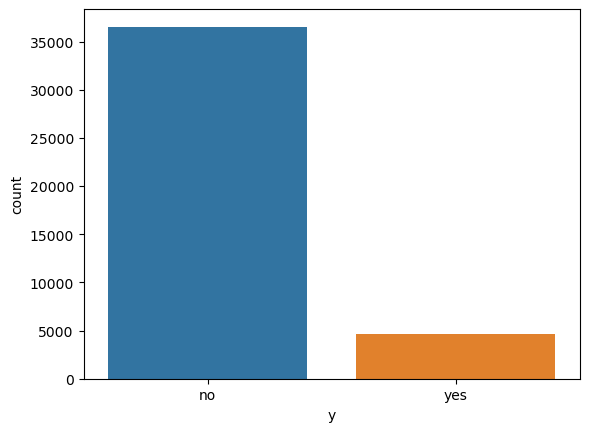

In [18]:
sns.countplot(x='y',data = df)

Histogram for the numerical features :



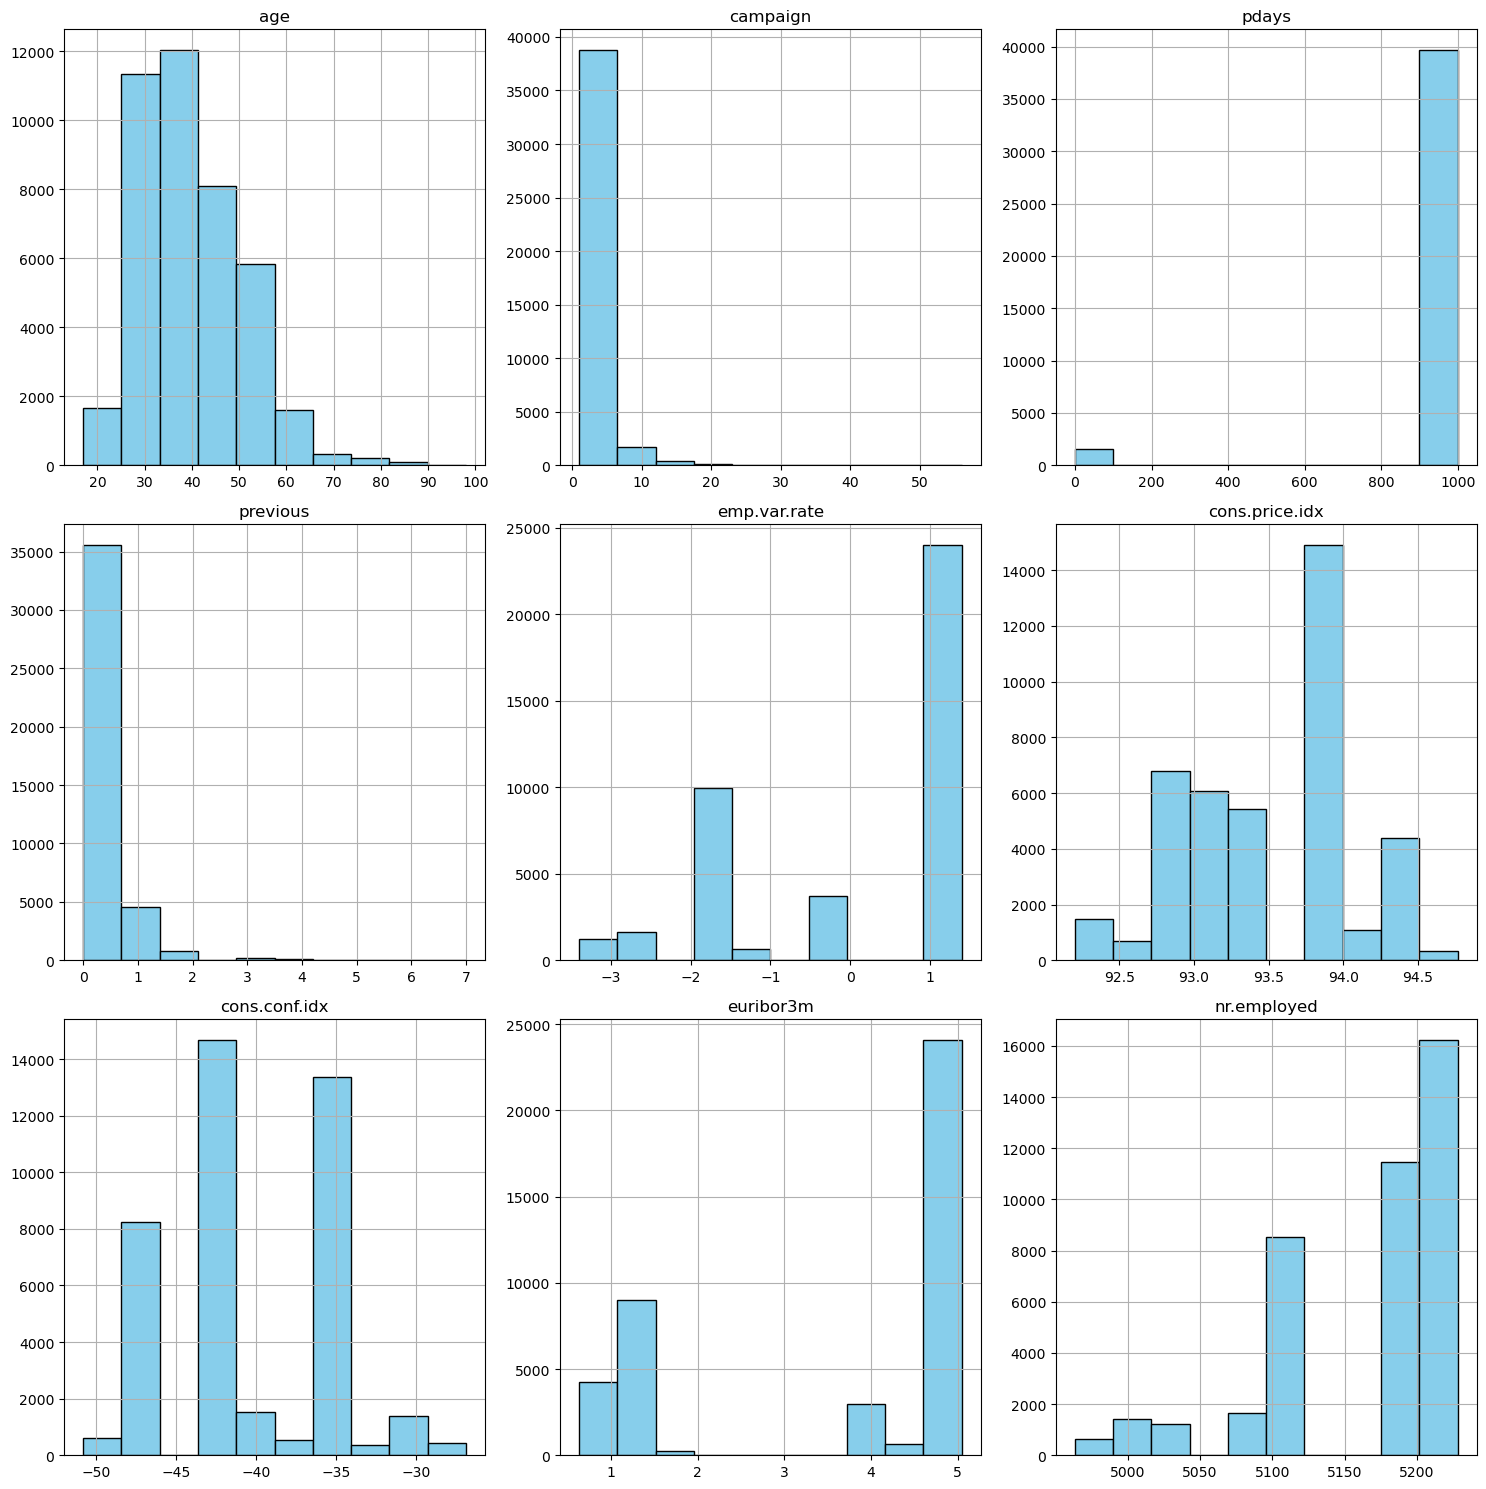

In [19]:
# melihat
print("Histogram for the numerical features :\n")
df.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()
     

## Preprcocessing

In [20]:
from sklearn.preprocessing import LabelEncoder
# Loop untuk mengkodekan kolom-kolom bertipe objek
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [21]:
x = df.iloc[:, :-1]  # Memilih semua kolom kecuali kolom terakhir (target) untuk X
y = df.iloc[:, -1]   # Memilih kolom terakhir (target) untuk y
 

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split    
# standarisasi features(x)
sc=StandardScaler()
sc.fit_transform(x)

array([[ 1.53314313, -0.20147477, -0.28370335, ...,  0.88656813,
         0.71246263,  0.33169507],
       [ 1.62910732,  0.9113627 , -0.28370335, ...,  0.88656813,
         0.71246263,  0.33169507],
       [-0.29017656,  0.9113627 , -0.28370335, ...,  0.88656813,
         0.71246263,  0.33169507],
       ...,
       [ 1.53314313,  0.35494396, -0.28370335, ..., -2.22505906,
        -1.49519696, -2.81568858],
       [ 0.3815728 ,  1.46778143, -0.28370335, ..., -2.22505906,
        -1.49519696, -2.81568858],
       [ 3.26049862,  0.35494396, -0.28370335, ..., -2.22505906,
        -1.49519696, -2.81568858]])

## Logistik Regretion

In [23]:
# split data menjadi train dan test
x_trainlG,x_testlG,y_trainlG,y_testlG =  train_test_split(x, y, test_size=0.3, random_state=2)
  

In [24]:
model_logReg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model_logReg.fit(x_trainlG, y_trainlG)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [25]:
y_predlG = model_logReg.predict(x_testlG)
print(classification_report(y_testlG, y_predlG))


              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.69      0.19      0.29      1385

    accuracy                           0.90     12353
   macro avg       0.80      0.59      0.62     12353
weighted avg       0.88      0.90      0.87     12353



In [26]:
cm = confusion_matrix(y_testlG,y_predlG)
cm

array([[10851,   117],
       [ 1128,   257]], dtype=int64)

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_sm, y_sm = sm.fit_resample(x, y)
     

In [28]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.25,random_state=2)


In [29]:
lr=LogisticRegression(penalty = 'l1',solver = 'liblinear')
lr.fit(x_train_sm,y_train_sm)
pred_lr=lr.predict(x_test_sm)
print(classification_report(y_test_sm, pred_lr))
     

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      9208
           1       0.77      0.74      0.76      9061

    accuracy                           0.76     18269
   macro avg       0.76      0.76      0.76     18269
weighted avg       0.76      0.76      0.76     18269



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## KKN

In [30]:
# split data menjadi train dan test
X_trainK, X_testK, y_trainK, y_testK = train_test_split(x, y, test_size = 0.2, random_state = 101)
     


In [31]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainK, y_trainK)
    pred_i = knn.predict(X_testK)
    error.append(np.mean(pred_i != y_testK))

Text(0, 0.5, 'Error mean')

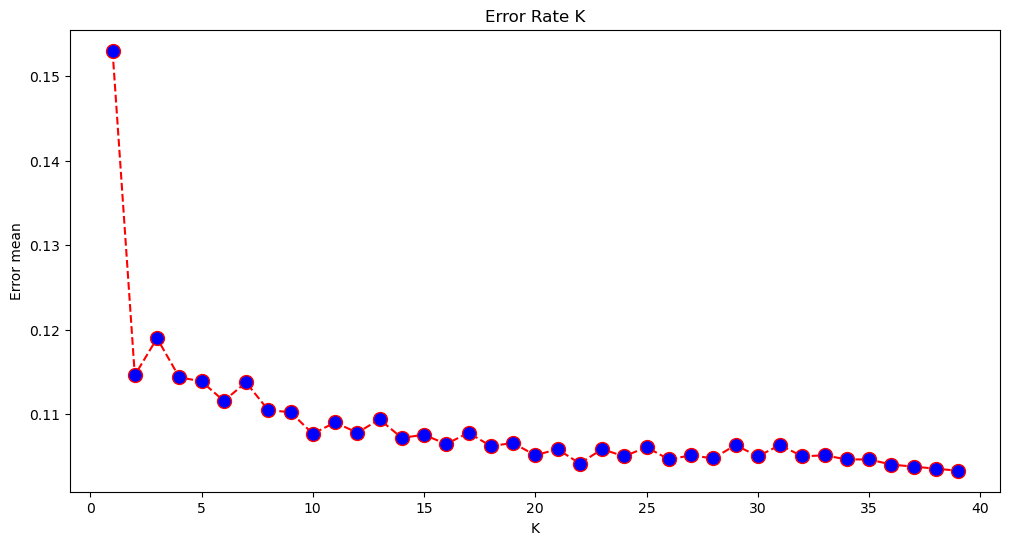

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

In [33]:
knn = KNeighborsClassifier(n_neighbors=24)

#Train the model using the training sets
knn.fit(X_trainK, y_trainK)

#Predict the response for test dataset
y_predK = knn.predict(X_testK)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testK, y_predK))
     

Accuracy: 0.8949732880038854


## Decision Tree

In [34]:
# split data menjadi train dan test
X_trainDt, X_testDt, y_trainDt, y_testDt = train_test_split(x, y, test_size=0.3, random_state=1)

In [35]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_trainDt,y_trainDt)

#Predict the response for test dataset
y_predDt = clf.predict(X_testDt)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_testDt, y_predDt))
     

Accuracy: 0.8373674411074233


## Random Forest

In [37]:
# split dataset train and test
x_trainRf,x_testRf,y_trainRf,y_testRf = train_test_split(x,y, test_size = 0.2,random_state = 202)

In [38]:
# train model
rf=RandomForestClassifier(n_estimators=100)
rf = rf.fit(x_trainRf,y_trainRf)

In [39]:
# prediction on test set
y_predRf=rf.predict(x_testRf)


In [40]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testRf, y_predRf))

Accuracy: 0.8908450704225352


## Naive Bayes

In [41]:
# Memisahkan data menjadi set train dan test
X_trainNb, X_testNb, y_trainNb, y_testNb = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
# Membuat model Naive Bayes (Gaussian Naive Bayes)
naive_bayes_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data pelatihan
naive_bayes_model.fit(X_trainNb, y_trainNb)

# Memprediksi kelas pada set uji
y_predNb = naive_bayes_model.predict(X_testNb)

     

In [43]:
print("Accuracy:",metrics.accuracy_score(y_testNb, y_predNb))

Accuracy: 0.8322000971345314


## SVM

In [44]:
from sklearn import svm

# split data menjadi train dan test
X_trainSvm, X_testSvm, y_trainSvm, y_testSvm = train_test_split(x, y, test_size = 0.2, random_state = 101)
     

In [45]:

# Membuat Model svm
svm_model = svm.SVC(kernel='linear', C=1.0, random_state=42)
     


In [46]:
# menggunakan SMOTE karena saat training data kode nya susah diekesekusi
svm_model_SMOTE = svm.SVC(kernel='linear', C=1.0, random_state=42)
svm_model_SMOTE.fit(x_train_sm,y_train_sm)
y_predSvm_SMOTE = svm_model_SMOTE.predict(x_test_sm)
print("Accuracy:",metrics.classification_report(y_test_sm, y_predSvm_SMOTE))

     

Accuracy:               precision    recall  f1-score   support

           0       0.68      0.92      0.78      9208
           1       0.87      0.56      0.68      9061

    accuracy                           0.74     18269
   macro avg       0.77      0.74      0.73     18269
weighted avg       0.77      0.74      0.73     18269



## Perbandingan Model

In [47]:
print("Logistic Regression:", metrics.accuracy_score(y_testlG, y_predlG))
print("Decision Tree:", metrics.accuracy_score(y_testDt, y_predDt))
print("Random Forest:", metrics.accuracy_score(y_testRf, y_predRf))
print("SVM:", metrics.accuracy_score(y_test_sm, y_predSvm_SMOTE))
print("Naive Bayes:", metrics.accuracy_score(y_testNb, y_predNb))
print("KNN:", metrics.accuracy_score(y_testK, y_predK))

Logistic Regression: 0.8992147656439731
Decision Tree: 0.8373674411074233
Random Forest: 0.8908450704225352
SVM: 0.736712463736384
Naive Bayes: 0.8322000971345314
KNN: 0.8949732880038854


## Algorithm Analysis

1. Terdapat 11.3 % client yang memutuskan untuk menjadi nasabah di bank, sementara sisanya 88.7 % client memutuskan untuk tidak bergabung menjadi nasabah bank. Sehingga dapat disimpulkan bahwa teknik marketing melalui telepon ini kurang efektif untuk dilakukan.
2. Dari beberapa pemodelan Machine Learning yang sudah dilakukan, semuanya memiliki akurasi yang cukup baik. Adapun hasil akurasi dari model-model Machine Learning yang digunakan :
Logistic Regression = 89,9%
K-Nearest Neighbour = 83,7%
Support Vector Machine = 73,6%
Decision Tree = 83,7%
Random Forest = 89%
Naive Bayes = 83,2%
3. dari ke enam model diatas bisa dilihat untuk akurasi paling baik yaitu menggunakan model Logistic Regression yaitu akurasinya sebesar 89,9%.
